박스플랏 seaborn → 박스 모집도? 평균, 중간값

가운데 바 그래프

이너파이 그래프


<피드백>
1. 막대 그래프 의미 없으면 색X
2. 스캐터플랏 → 좀 퍼지게 하는 방법으로 안겹치게
3. 히트맵 기준 제시 → 컬러바(0을 제일 흐릿하게, 발산형 컬러테이블)

# **데이터시각화_과제3_19013227_박민지**

In [1]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline

#io와 pandas 모듈 import
import io 
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

# 한글 깨짐1
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 꺾은선 그래프 (2021 성북구 기온)

In [2]:
data=pd.read_csv("/content/서울특별시 성북구_월별기온_20210101.csv", encoding='CP949')
data.head()


,월,최고극값,평균,최저극값
0,1월,7.6,-0.7,-9.7
1,2월,12.9,1.4,-9.9
2,3월,19.9,7.3,-2.4
3,4월,27.2,12.2,0.6
4,5월,33.4,19.1,9.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


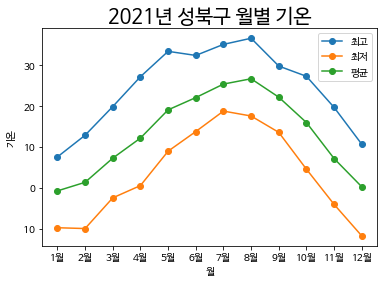

In [3]:
from matplotlib.pyplot import rc, plot, show, imshow, title, xlabel, ylabel, legend

colors=["red","blue","green"]
plot(data["월"], data["최고극값"], data["월"], data["최저극값"], data["월"], data["평균"], marker='o')

title('2021년 성북구 월별 기온', size=20)
xlabel('월')
ylabel('기온')
legend(['최고', '최저', '평균'])

# 파이차트 (인천광역시 재산범죄)

In [ ]:
data=pd.read_csv("/content/경찰청 인천광역시경찰청_관서별 재산범죄 발생건수 현황_20211231.csv", encoding='CP949')
data

,구분,중부서,미추홀서,남동서,부평서,서부서,계양서,강화서,연수서,삼산서,논현서
0,절도,538,1315,799,962,1504,661,146,943,826,477
1,장물,0,5,1,1,4,3,0,0,3,2
2,사기,1247,2675,1637,1131,2764,1316,320,1807,1252,1043
3,횡령,370,703,430,359,578,274,48,434,265,210
4,배임,13,28,13,8,27,13,12,26,9,13
5,손괴죄,243,496,374,368,535,273,90,284,327,130


In [ ]:
df = data.sum(axis=1)
data["합계"] = df

A = data[data['구분'] == '장물'].index
data.drop(A,axis='index',inplace=True)

df = pd.DataFrame()
df["구분"] = data["구분"]
df["합계"] = data["합계"]
df = df.sort_values('합계',ascending=False)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,구분,합계
2,사기,15192
0,절도,8171
3,횡령,3671
5,손괴죄,3120
4,배임,162


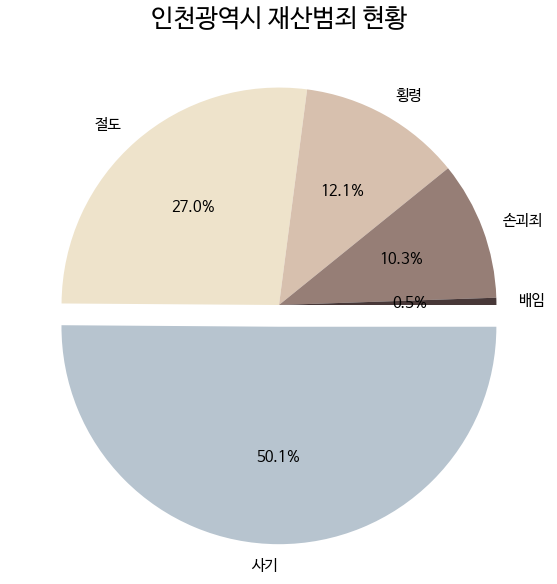

In [ ]:
import matplotlib.pyplot as plt

ratio = df["합계"]
labels=df["구분"]
#labels = ["사기","절도","횡령","손괴죄","배임"]

explode = [0.1, 0.0,0.0, 0.0,0.0]
colors = ['#B7C4CF','#EEE3CB','#D7C0AE','#967E76', '#483838' ]

plt.figure(figsize=(10,10))
plt.rc('font', size=15)        # 기본 폰트 크기
#plt.rc('figure', titlesize=150) # figure title 폰트 크기

plt.title('인천광역시 재산범죄 현황',fontsize=25)
plt.pie(ratio,labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode=explode, shadow=False, colors=colors)
plt.show()

# 히트맵

In [ ]:
data=pd.read_csv("/content/경찰청_연령별 음주운전 적발기록 현황_20210326.csv",encoding='CP949')
data.head()

data=data.set_index("구분")
data

,10대,20대,30대,40대,50대이상
구분,,,,,
2010,1910,59445,93114,94149,53929
2011,1693,48217,79594,79279,49394
2012,1731,44968,75883,75286,50062
2013,1688,46242,83313,81250,57230
2014,1773,41857,75954,75451,56640
2015,1933,40497,71102,71266,58235
2016,1761,39627,66090,64556,54448
2017,1614,38251,58244,55877,51134
2018,1304,30372,45015,43097,43239


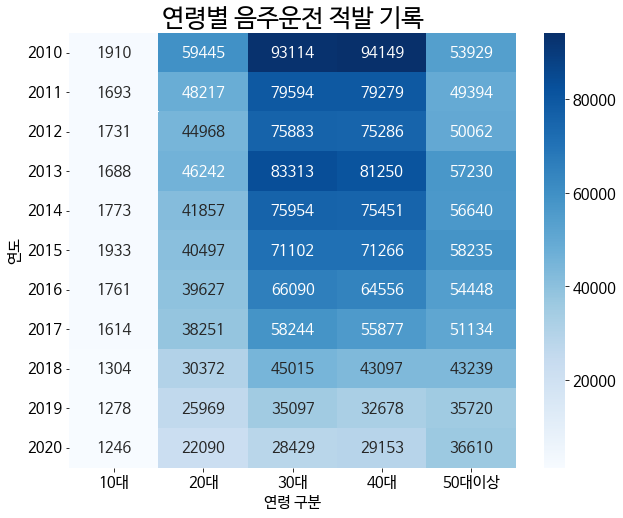

In [ ]:

import seaborn as sns

#df_pivot = pd.pivot_table(data, index=['주요품목별'])

plt.figure(figsize=(10,8))
sns.heatmap(data, annot=True, cmap='Blues', fmt='g') # fmt='g': e-notation을 일반표기법으로)
plt.yticks(rotation=0)
plt.title('연령별 음주운전 적발 기록', size=25)
plt.xlabel('연령 구분') #가로축 정보 표시
plt.ylabel('연도') #세로축 정보 표시

plt.show()


## 누적 막대그래프

In [7]:
import pandas as pd
data=pd.read_csv("/content/경찰청_보이스피싱 현황_20201231.csv", encoding='CP949')

data=data.set_index("구분")
data.head()

,기관사칭형,대출사기형
구분,,
2016,3384,13656
2017,5685,18574
2018,6221,27911
2019,7219,30448
2020,7844,23837


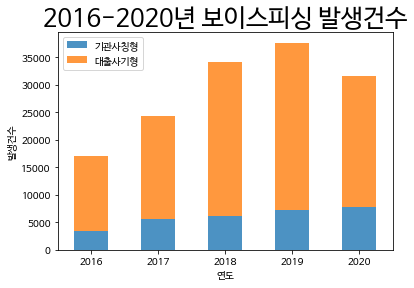

In [8]:
data.plot.bar(stacked=True, rot=0,alpha = 0.8)

plt.title('2016-2020년 보이스피싱 발생건수', size=25)
plt.ylabel('발생건수') #가로축 정보 표시
plt.xlabel('연도') #세로축 정보 표시
plt.show()

# 스캐터플롯(8호선 출퇴근시간 승하차 인원)

In [57]:
data=pd.read_csv("/content/8호선.csv", encoding='CP949')
data

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원
0,22,0,2359,2607,5033,6178,9316,12868,10573,32663,...,7995,7384,8196,6671,4269,4510,1028,2154,2,1032
1,19,0,4754,1075,9399,4799,25928,12653,33360,30030,...,5911,13064,5516,11896,3371,10827,708,2979,2,332
2,32,3,10003,1439,18119,4994,43098,10506,54581,18918,...,5365,18898,4298,19374,2666,16448,767,5661,0,133
3,19,0,8488,1822,13917,7335,31340,10327,35971,16802,...,5170,16098,4355,14900,3076,11270,559,5187,0,91
4,22,0,1981,730,3232,3084,7371,3705,9863,6471,...,3459,2760,3517,3003,2355,2414,503,928,1,124
5,0,0,1421,1052,3301,5175,9445,7384,13628,20267,...,5867,5814,5670,5191,4370,4666,1232,1528,0,112
6,4,0,2009,3071,5605,9546,18860,47325,24544,146144,...,23597,11465,23489,9723,12447,7670,2133,3216,0,75
7,11,0,4030,2357,8579,8801,26993,11231,33047,16598,...,7559,12904,6375,11395,4458,9995,1271,2955,4,125
8,22,0,3712,719,7491,2600,19717,3464,22661,6576,...,2168,9928,1766,9496,1025,8358,458,2971,1,85
9,0,0,2779,589,5007,3792,13042,7476,19150,19478,...,7747,9183,8197,8666,6197,6367,1197,2544,3,320


In [10]:
df=pd.DataFrame()
df['6-9시 승차인원'] = data['06시-07시 승차인원']+data['07시-08시 승차인원']+data['08시-09시 승차인원']
df['6-9시 하차인원'] = data['06시-07시 하차인원']+data['07시-08시 하차인원']+data['08시-09시 하차인원']
df['18-21시 승차인원'] = data['18시-19시 승차인원']+data['19시-20시 승차인원']+data['20시-21시 승차인원']
df['18-21시 하차인원'] = data['18시-19시 하차인원']+data['19시-20시 하차인원']+data['20시-21시 하차인원']
df

,6-9시 승차인원,6-9시 하차인원,18-21시 승차인원,18-21시 하차인원
0,24922,51709,42831,32822
1,68687,47482,39352,66818
2,115798,34418,33234,92114
3,81228,34464,32332,73825
4,20466,13260,16821,15655
5,26374,32826,32511,30181
6,49009,203015,173956,60349
7,68619,36630,42822,64431
8,49869,12640,11433,47741
9,37199,30746,35958,49226


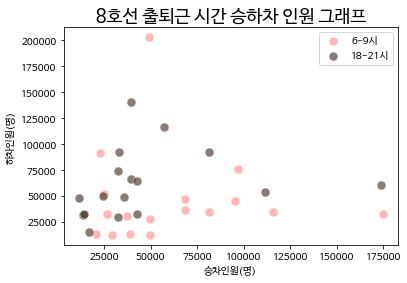

In [33]:
import seaborn as sns

ax=sns.scatterplot(x='6-9시 승차인원',y='6-9시 하차인원',data=df,s=80,alpha=.6,color='#FF8787', label='6-9시')
ax=sns.scatterplot(x='18-21시 승차인원',y='18-21시 하차인원',data=df,s=80,alpha=.6,color='#3C2317',label='18-21시')
plt.title('8호선 출퇴근 시간 승하차 인원 그래프',size=18)
plt.xlabel('승차인원(명)') #가로축 정보 표시
plt.ylabel('하차인원(명)') #세로축 정보 표시
ax.legend()
plt.show()

# 박스플롯(신림선 출퇴근시간 승하차 인원)

In [119]:
data=pd.read_csv("/content/신림선.csv", encoding='CP949')
data


,지하철역,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원
0,관악산(서울대),1422,1872,4375,3595,4920,8842,7786,3798,3036,3191,1493,1906
1,당곡,3239,845,9575,2501,14563,6471,7537,13980,4190,10604,3309,6087
2,대방,1329,897,4056,2188,7048,4078,5083,5740,2594,3346,2181,2380
3,보라매,1809,1053,5140,3320,9090,9373,8566,8310,3664,6314,2701,3536
4,보라매공원,1263,1289,3864,2772,4676,6711,5605,5105,1881,3925,1474,2433
5,보라매병원,1659,3275,5083,13751,6704,45760,34262,9027,9142,6757,6329,3822
6,샛강,685,1874,1016,8471,1786,19958,14240,4171,4403,2489,2925,1280
7,서울대벤처타운,6043,1819,19371,4359,27250,7204,11175,24830,6474,20868,4508,11517
8,서울지방병무청,1887,846,6103,3530,8763,4848,3906,8437,1909,6149,1321,3768
9,서원,2953,554,10158,1121,16492,1614,3322,10366,2077,8946,1322,5480


In [120]:

df=pd.DataFrame()
df['지하철역'] = data['지하철역']
df['6-9시 승차인원'] = data['06시-07시 승차인원']+data['07시-08시 승차인원']+data['08시-09시 승차인원']
df['6-9시 하차인원'] = data['06시-07시 하차인원']+data['07시-08시 하차인원']+data['08시-09시 하차인원']
df['18-21시 승차인원'] = data['18시-19시 승차인원']+data['19시-20시 승차인원']+data['20시-21시 승차인원']
df['18-21시 하차인원'] = data['18시-19시 하차인원']+data['19시-20시 하차인원']+data['20시-21시 하차인원']
df

,지하철역,6-9시 승차인원,6-9시 하차인원,18-21시 승차인원,18-21시 하차인원
0,관악산(서울대),10717,14309,12315,8895
1,당곡,27377,9817,15036,30671
2,대방,12433,7163,9858,11466
3,보라매,16039,13746,14931,18160
4,보라매공원,9803,10772,8960,11463
5,보라매병원,13446,62786,49733,19606
6,샛강,3487,30303,21568,7940
7,서울대벤처타운,52664,13382,22157,57215
8,서울지방병무청,16753,9224,7136,18354
9,서원,29603,3289,6721,24792


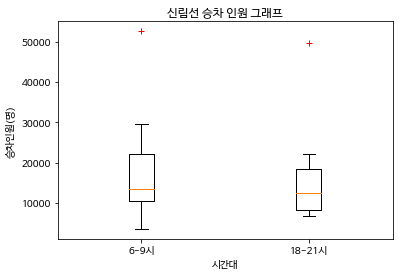

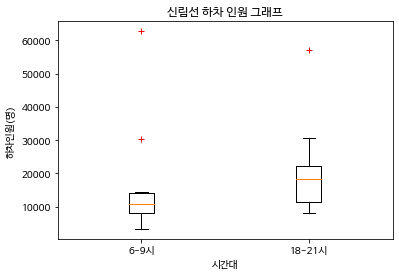

In [158]:
ax1=plt.boxplot([df[df.columns[1]],df[df.columns[3]]],sym='r+')
ax1=plt.title('신림선 승차 인원 그래프')
ax1=plt.xticks([1,2],['6-9시','18-21시'])
plt.xlabel('시간대') #가로축 정보 표시
plt.ylabel('승차인원(명)') #세로축 정보 표시
plt.show()

ax2=plt.boxplot([df[df.columns[2]],df[df.columns[4]]],sym='r+')
ax2=plt.title('신림선 하차 인원 그래프')
ax2=plt.xticks([1,2],['6-9시','18-21시'])
plt.xlabel('시간대') #가로축 정보 표시
plt.ylabel('하차인원(명)') #세로축 정보 표시
plt.show()